In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape, t_c.shape == t_u.shape

(torch.Size([11, 1]), True)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [4]:
shuffled_indeices = torch.randperm(n_samples)

In [5]:
train_indices = shuffled_indeices[:-n_val]
val_indices = shuffled_indeices[-n_val:]

train_indices, val_indices

(tensor([8, 9, 2, 1, 0, 7, 5, 6, 3]), tensor([10,  4]))

In [6]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

In [7]:
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

---

In [ ]:
import torch.nn as nn

In [8]:
linear_model = nn.Linear(1, 1)  # nn.Linear(in_features, out_features)

tensor([[4.0034],
        [3.3106]], grad_fn=<AddmmBackward0>)

在PyTorch中，`nn.Linear(n, m)`创建了一个线性层，这是神经网络中最常见的一种层。

`n`和`m`是两个参数，分别代表输入特征的数量和输出特征的数量。

- `n`（`in_features`）：输入的特征数量。对于一个输入数据点，这就是它的维度。例如，如果每个输入数据点是一个10维的向量，那么`n`就是10。

- `m`（`out_features`）：输出的特征数量。这决定了线性层的神经元数量。例如，如果你希望这个线性层输出一个5维的向量，那么`m`就是5。

在你给出的代码中，`nn.Linear(1, 1)`创建了一个输入特征数量和输出特征数量都是1的线性层。这意味着这个线性层接受一个数值作为输入，输出一个数值。

> PS
>
> 线性层，也被称为全连接层或者密集层，是神经网络中最基本的一种层。在一个线性层中，每一个输入特征都与每一个输出特征相连，连接的权重就是该层要学习的参数。
> 
> 除了线性层，神经网络中还有很多其他类型的层，以下是一些常见的例子：
> 
> - **卷积层（Convolutional Layer）**：在卷积神经网络（CNN）中使用，主要用于处理图像数据。卷积层通过在输入数据上滑动小的窗口（也称为卷积核）来进行计算，可以有效地捕捉局部特征。
> - **循环层（Recurrent Layer）**：在循环神经网络（RNN）中使用，主要用于处理序列数据。循环层可以记住前面的信息，并将这些信息用于后续的计算。
> - **池化层（Pooling Layer）**：在卷积神经网络中使用，主要用于降低数据的维度，减少计算量。常见的池化操作有最大池化（Max Pooling）和平均池化（Average Pooling）。
> - **Dropout层**：用于防止过拟合。在训练过程中，Dropout层会随机地将一部分神经元的输出置为0，这可以增加模型的泛化能力。
> - **归一化层（Normalization Layer）**：例如Batch Normalization层，用于对输入数据进行归一化，使得数据的分布更加稳定，有助于网络的训练。
> 
> 这些层都可以在PyTorch的`torch.nn`模块中找到。

In [33]:
t_un_val.shape == linear_model(t_un_val).shape, t_un_train.shape == linear_model(t_un_train).shape

(True, True)

`linear_model`是一个线性层，它的输入和输出特征数量都是1（即`nn.Linear(1, 1)`）。因此，无论输入数据的形状是什么，只要最后一维是1，经过这个线性层处理后的输出形状应该与输入数据的形状相同。

例如，如果输入数据的形状是`(batch_size, 1)`，那么经过`nn.Linear(1, 1)`处理后的输出形状也应该是`(batch_size, 1)`。

这段代码的目的可能是为了确保模型的输出形状与预期相符，这是在实现和调试神经网络模型时的一个常见步骤。

In [9]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.5725]], requires_grad=True),
 Parameter containing:
 tensor([0.0872], requires_grad=True))

In [10]:
x = torch.ones(1)
linear_model(x)

tensor([0.6597], grad_fn=<AddBackward0>)

👆

$$
linear\_model(x) = 1 \times linear\_model.weight + 1 \times linear\_model.bias
$$

In [11]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597],
        [0.6597]], grad_fn=<AddmmBackward0>)

In [12]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [13]:
linear_model.parameters()

<generator object Module.parameters at 0x7f2f6efbf300>

In [14]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8736]], requires_grad=True),
 Parameter containing:
 tensor([0.8900], requires_grad=True)]

> 常用技巧的:
>
> `linear_model.parameters()`是不给看的, 要加个`list()`才能看到, 也就是`list(linear_model.parameters())`

In [15]:
def train_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

这个函数是用来训练神经网络模型的。以下是这个函数的主要步骤：

1. 这个函数接受7个参数：训练的轮数（`n_epochs`），优化器（`optimizer`），模型（`model`），损失函数（`loss_fn`），训练输入数据（`t_u_train`），验证输入数据（`t_u_val`），训练目标数据（`t_c_train`），验证目标数据（`t_c_val`）。

2. 在每一轮训练中（从1到`n_epochs`）：

   - **使用模型对训练输入数据进行预测**，得到预测结果`t_p_train`。

   - **计算训练损失**，即预测结果`t_p_train`和训练目标数据`t_c_train`之间的差距。

   - **使用模型对验证输入数据进行预测**，得到预测结果`t_p_val`。

   - **计算验证损失**，即预测结果`t_p_val`和验证目标数据`t_c_val`之间的差距。

   - **清除优化器中的梯度信息**，使用`optimizer.zero_grad()`清除优化器中的梯度信息。这是因为PyTorch在默认情况下会累积梯度，所以在每一轮训练开始时需要清除旧的梯度信息。

   - **清除优化器中的梯度信息**，使用`loss_train.backward()`清除优化器中的梯度信息。

   - **更新模型的参数**，使用`optimizer.step()`更新模型的参数。

3. 在每一轮训练开始时，以及每1000轮训练后，打印出当前的轮数，训练损失和验证损失。

In [16]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

这个函数是一个损失函数，用于计算预测值（`t_p`）和目标值（`t_c`）之间的差距。

以下是这个函数的主要步骤：

1. 计算预测值（`t_p`）和目标值（`t_c`）之间的差值。

2. 将差值平方，这样所有的差值都是正数，而且大的差值会被赋予更大的权重。

3. 计算所有平方差值的平均值（`.mean()`），得到一个单一的数值。这个数值就是预测值和目标值之间的平均平方误差（Mean Squared Error，MSE），它是一种常用的损失函数。

这个损失函数的值越小，说明模型的预测结果越接近目标值。在训练神经网络模型时，目标就是通过调整模型的参数来最小化这个损失函数的值。

In [17]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

train_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 184.0196, Validation loss 310.1558
Epoch 1000, Training loss 3.5364, Validation loss 4.3633
Epoch 2000, Training loss 2.8885, Validation loss 3.3645
Epoch 3000, Training loss 2.8758, Validation loss 3.2486

Parameter containing:
tensor([[5.2903]], requires_grad=True)
Parameter containing:
tensor([-16.8808], requires_grad=True)


👆

定义的`loss_fn`函数和`nn.MSELoss()`实际上是做同样的事情：它们都计算预测值和目标值之间的均方误差（Mean Squared Error，MSE）。具体来说，它们都先计算预测值和目标值之间的差值，然后对差值进行平方，最后计算所有平方差值的平均值。

主要的区别在于，`nn.MSELoss()`是PyTorch的内置函数，它可能包含一些优化和额外的功能，如支持自动梯度计算和GPU加速。而定义的`loss_fn`函数是一个简单的Python函数，它可能没有这些额外的功能。

这两个函数应该是可以互换的。

👇

In [18]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

train_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 96.2652, Validation loss 157.3088
Epoch 1000, Training loss 3.4957, Validation loss 4.3218
Epoch 2000, Training loss 2.8877, Validation loss 3.3602
Epoch 3000, Training loss 2.8758, Validation loss 3.2480

Parameter containing:
tensor([[5.2906]], requires_grad=True)
Parameter containing:
tensor([-16.8824], requires_grad=True)


In [19]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

train_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.L1Loss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 12.6254, Validation loss 19.5084


Epoch 1000, Training loss 4.4408, Validation loss 3.6014
Epoch 2000, Training loss 3.9015, Validation loss 3.3706
Epoch 3000, Training loss 3.3610, Validation loss 3.1478

Parameter containing:
tensor([[3.0690]], requires_grad=True)
Parameter containing:
tensor([-5.5259], requires_grad=True)


In [20]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

这段代码定义了一个简单的神经网络模型，该模型由两个线性层和一个激活函数层组成。这个模型是使用PyTorch的`nn.Sequential`类创建的，这个类允许我们将多个网络层堆叠在一起，形成一个完整的网络。

以下是这个模型的详细解释：

1. `nn.Linear(1, 13)`：这是一个线性层，它接受一个输入特征并返回13个输出特征。这个层的权重和偏置参数会在训练过程中被优化。

2. `nn.Tanh()`：这是一个激活函数层，它对上一层的输出应用双曲正切函数。这个函数可以将任何输入值映射到-1和1之间，这有助于增加模型的非线性，使得模型可以拟合更复杂的数据。

3. `nn.Linear(13, 1)`：这是另一个线性层，它接受13个输入特征并返回一个输出特征。这个层的权重和偏置参数也会在训练过程中被优化。

这个模型的输入将首先通过第一个线性层，然后通过激活函数层，最后通过第二个线性层，得到最终的输出。

In [21]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

这段代码是获取神经网络模型`seq_model`中所有参数的形状。

在PyTorch中，模型的参数是以张量（Tensor）的形式存储的，每个参数都有一个形状，这个形状描述了张量的维度。例如，一个形状为`(3, 2)`的张量是一个3x2的矩阵，一个形状为`(5,)`的张量是一个长度为5的向量。

`seq_model.parameters()`是一个生成器，它可以遍历模型中的所有参数。对于每个参数，我们使用`.shape`属性获取其形状，然后将所有的形状放入一个列表中。

这个代码的输出是一个列表，列表中的每个元素都是一个参数的形状。这可以帮助我们理解模型的结构，例如，我们可以看到每个层有多少个输入特征和输出特征。

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [23]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(1, 8)),
            ('hidden_activation', nn.Tanh()),
            ('output_linear', nn.Linear(8, 1))
            ]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

这段代码定义了一个简单的神经网络模型，该模型由两个线性层和一个激活函数层组成。这个模型是使用PyTorch的`nn.Sequential`类创建的，这个类允许我们将多个网络层堆叠在一起，形成一个完整的网络。

以下是这个模型的详细解释：

1. `nn.Linear(1, 8)`：这是一个线性层，它接受一个输入特征并返回8个输出特征。这个层的权重和偏置参数会在训练过程中被优化。

2. `nn.Tanh()`：这是一个激活函数层，它对上一层的输出应用双曲正切函数。这个函数可以将任何输入值映射到-1和1之间，这有助于增加模型的非线性，使得模型可以拟合更复杂的数据。

3. `nn.Linear(8, 1)`：这是另一个线性层，它接受8个输入特征并返回一个输出特征。这个层的权重和偏置参数也会在训练过程中被优化。

这个模型的输入将首先通过第一个线性层，然后通过激活函数层，最后通过第二个线性层，得到最终的输出。

此外，这个模型使用了`OrderedDict`来命名每一层，这使得我们可以通过名字来访问模型中的特定层。例如，我们可以使用`seq_model.hidden_linear`来访问第一个线性层。

In [24]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [25]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.3463], requires_grad=True)

In [26]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

train_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 162.6807, Validation loss 274.3244


Epoch 1000, Training loss 6.4834, Validation loss 5.2408
Epoch 2000, Training loss 2.9536, Validation loss 2.2079
Epoch 3000, Training loss 2.3361, Validation loss 2.0404
Epoch 4000, Training loss 2.1326, Validation loss 1.5746
Epoch 5000, Training loss 2.0841, Validation loss 1.4134
output tensor([[20.4599],
        [12.1459]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [11.]])
hidden tensor([[-6.2453],
        [-6.2407],
        [ 5.5296],
        [ 0.0504],
        [ 3.9202],
        [-0.0873],
        [-0.8407],
        [ 6.0447]])


- **输入**: `seq_model(t_un_val)`：这是将验证集的输入数据`t_un_val`传递给模型，模型会返回预测的输出。`print('output', seq_model(t_un_val))`将打印这些预测的输出。
-  **目标值**: `t_c_val`：这是验证集的目标值。`print('answer', t_c_val)`将打印这些目标值。
-   **隐藏层的权重梯度**: `seq_model.hidden_linear.weight.grad`：这是模型隐藏层的权重梯度。在反向传播过程中，PyTorch会计算每个参数的梯度，这些梯度用于更新参数。`print('hidden', seq_model.hidden_linear.weight.grad)`将打印隐藏层的权重梯度。

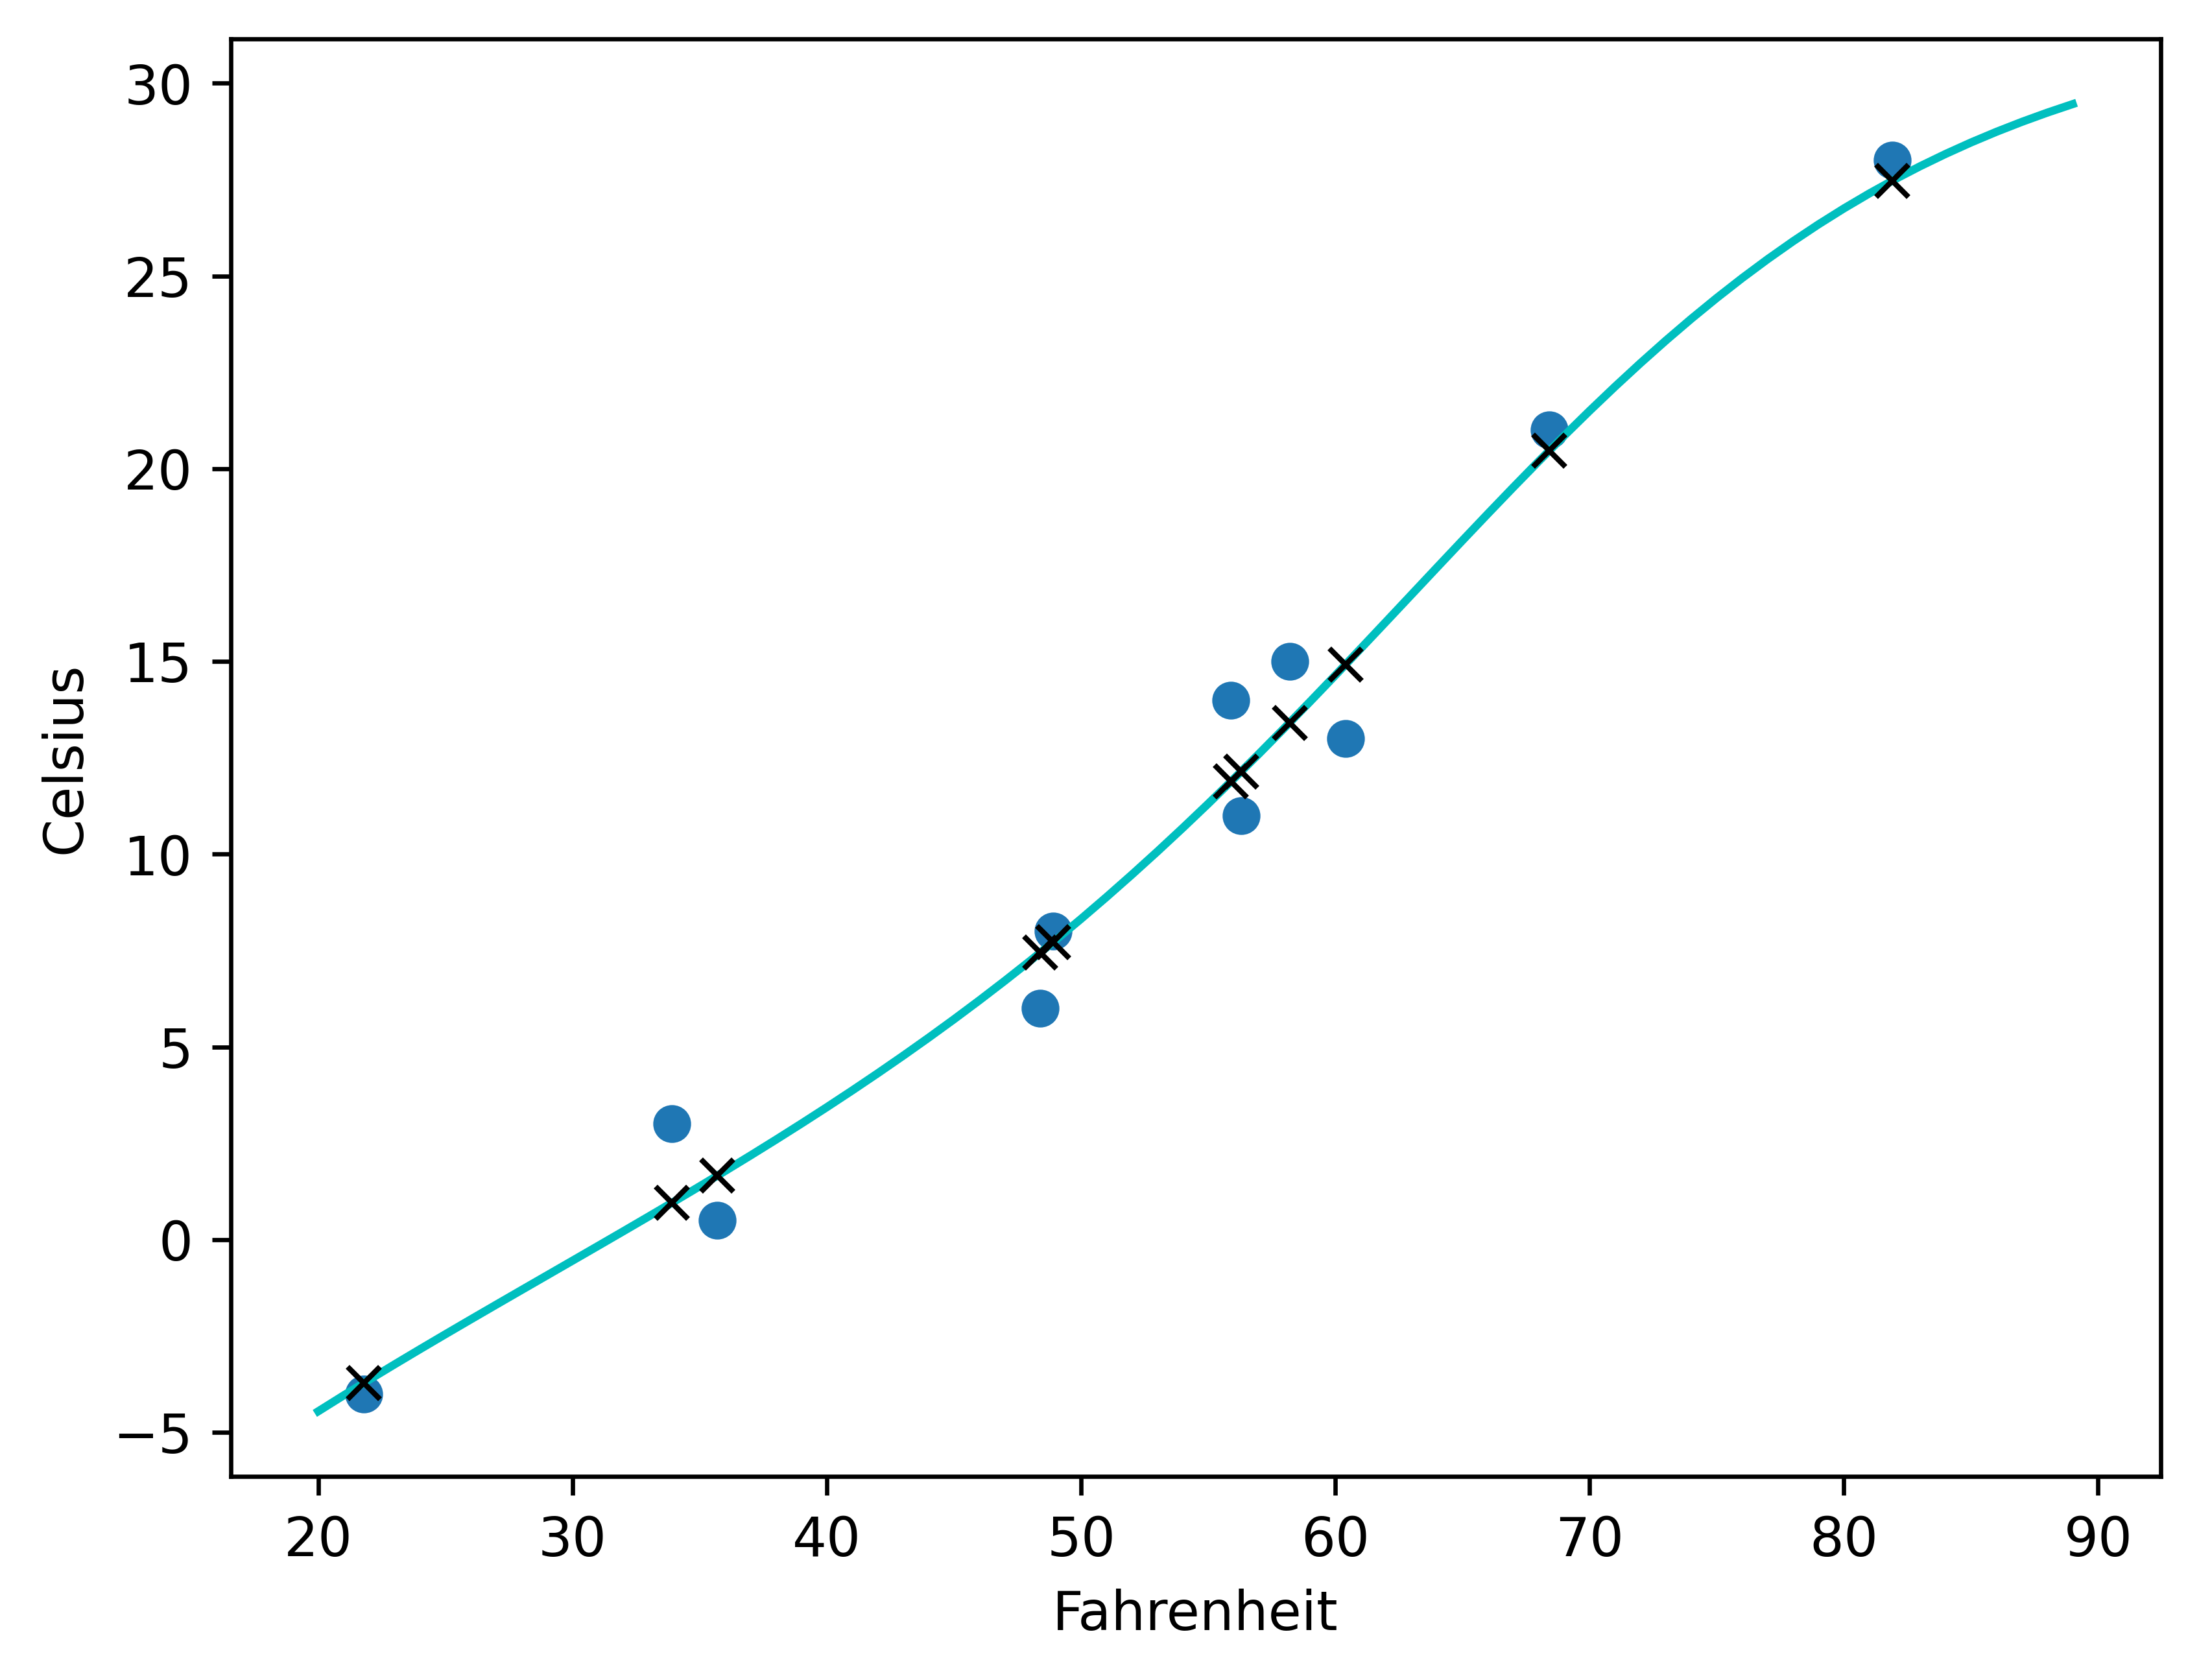

In [27]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 146.7679, Validation loss 245.8486
Epoch 1000, Training loss 64.8793, Validation loss 58.7617
Epoch 2000, Training loss 48.0688, Validation loss 42.3506
Epoch 3000, Training loss 32.7918, Validation loss 28.5675
Epoch 4000, Training loss 20.5488, Validation loss 18.0861
Epoch 5000, Training loss 12.7907, Validation loss 11.2197


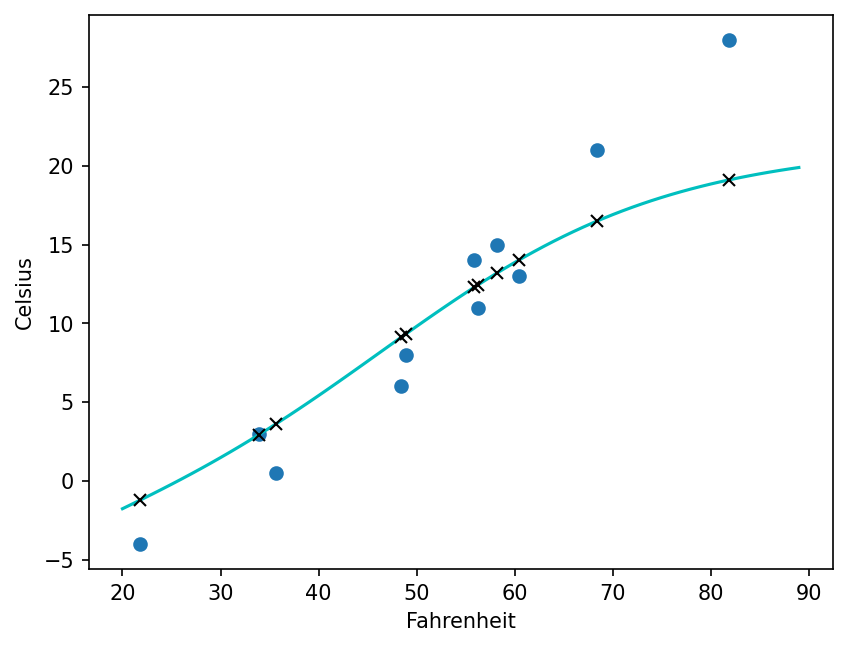

In [28]:
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(1, neuron_count)),
            ('hidden_activation', nn.Tanh()),
            ('output_linear', nn.Linear(neuron_count, 1))
            ]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

train_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

这段代码首先定义了一个神经网络模型，然后使用梯度下降优化器训练模型，最后使用matplotlib库绘制了模型的预测结果。

以下是详细的步骤：

1. 定义一个神经网络模型`seq_model`，该模型由两个线性层和一个激活函数层组成。第一个线性层`hidden_linear`接受一个输入特征并返回`neuron_count`个输出特征，然后通过激活函数`tanh`，最后通过第二个线性层`output_linear`返回一个输出特征。

2. 创建一个随机梯度下降（SGD）优化器`optimizer`，它将用于更新`seq_model`的参数。学习率被设置为0.0001。

3. 调用`train_loop`函数训练模型。这个函数接受以下参数：
   - 训练的轮数（5000轮）
   - 优化器（`optimizer`）
   - 模型（`seq_model`）
   - 损失函数（`nn.MSELoss()`）
   - 训练输入数据（`t_un_train`）
   - 验证输入数据（`t_un_val`）
   - 训练目标数据（`t_c_train`）
   - 验证目标数据（`t_c_val`）

4. 创建一个范围为20到90的张量`t_range`，并将其形状从`(70,)`改为`(70, 1)`。

5. 使用matplotlib库创建一个新的图形。

6. 在图形上绘制三条线：
   - 蓝色的圆点表示原始数据（`t_u`和`t_c`）。
   - 青色的线表示模型对`t_range`的预测结果。
   - 黑色的叉号表示模型对原始数据`t_u`的预测结果。

这段代码的目的是训练一个神经网络模型来预测温度的转换关系，并通过图形展示模型的预测效果。